# Road Rage: Finding the Ideal Speed Limit

### Assumptions
* Drivers want to go up to 120 km/hr.
* The average car is 5 meters long.
* Drivers want at least a number of meters equal to their speed in meters/second between them and the next car.
* Drivers will accelerate 2 m/s<sup>2</sup> up to their desired speed as long as they have room to do so.
* If another car is too close, drivers will match that car's speed until they have room again.
* If a driver would hit another car by continuing, they stop.
* Drivers will randomly (10% chance each second) slow by 2 m/s.
* This section of road is one lane going one way.
* Assume that drivers enter the road at the speed they left.
* Simulation starts with 30 cars per kilometer, evenly spaced.

## Normal Mode
We have a 1 kilometer section of road being built and do not know what the speed limit should be. This notebook simulates the 1 kilometer of road. Even though this road is not circular, the simulation treats it as such in order to generate a continuous flow of traffic.

In [1]:
from copy import deepcopy
import math
import matplotlib.pyplot as plt
import numpy as np
import random
from traffic_lib import *
%matplotlib inline

`HighwaySim.sim_data` is a list of lists; one list of each car's speed for each of the "ticks"

In [2]:
sim1 = HighwaySim()
print(sim1.run_sim(60))
np.shape(np.array(sim1.sim_graph))

28.5333333333


(60, 1000)

In [3]:
def highway_trials(num_trials=1000):
    """
    Run num_trials of run_sim
    """
    trial_stats = []
    for _ in range(num_trials):
        sim = HighwaySim()
        trial_stats.append(sim.run_sim(60))
    return trial_stats

In [4]:
highway_1000_data = highway_trials(10)

In [5]:
highway_1000_mean = np.mean(np.array(highway_1000_data))
highway_1000_std = np.std(np.array(highway_1000_data))
print("1000-Trial Mean: {}".format(highway_1000_mean))
print("1000-Trial Standard Deviation: {}".format(highway_1000_std))
print("Speed Limit Recommendation: {}".format(int(highway_1000_mean + highway_1000_std)))

1000-Trial Mean: 17.186666666666667
1000-Trial Standard Deviation: 7.752608163278558
Speed Limit Recommendation: 24


In [6]:
highway_1000_array = np.array(highway_1000_data)
np.shape(highway_1000_array)

(10,)

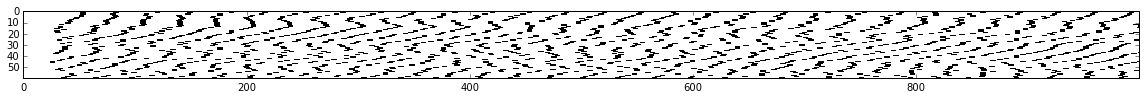

In [9]:
img_data = np.random.choice([0,1,1,1,1], (60, 1000)).astype('float32')
# print(img_data)

plt.figure(figsize=(20, 20)) # size is in "inches"
# plt.imshow(img_data, cmap='gray', interpolation='nearest')
plt.imshow(sim1.sim_graph, cmap='gray', interpolation='nearest')
plt.show()